# Part I -  Determinants of irrecoverable Prosper Loans
## by Nyiko Ndlebe

## Introduction
This study explores a dataset containing a list of loans from credit provider Prosper. There a total of 113,937 rows containing the details of loans issued from 2005 to 2014, with 81 different variables.

> The original data can be obtained from the link below: <br>
https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

>While a dictionary describing all the variables can be found below: <br>
> https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing

The aim of the investigation is to analyse the factors that may affect the likelihood of a borrower not completing a loan

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# Do not truncate data in cells
pd.set_option('display.max_colwidth', None)
# Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

%matplotlib inline

### Load dataset

In [2]:
# Load the dataset
prosper_data = pd.read_csv('prosperLoanData.csv')


In [3]:
# View structure of data - top 5 data points
prosper_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# View structure of data - bottom 5 data points
prosper_data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,C,5.0,1,IL,Food Service Management,Employed,246.0,True,False,NaN,2013-04-14 05:54:58,700.0,719.0,1997-09-01 00:00:00,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,"$50,000-74,999",True,4333.333333,9BD7367919051593140DB62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Professional,Employed,21.0,True,False,NaN,2011-11-03 20:42:53,700.0,719.0,1992-01-17 00:00:00,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000

<i> Comments: </i>

The head and tail functions reveal that there are number of missing values in the data

In [5]:
# View shape of the data
prosper_data.shape

(113937, 81)

In [6]:
# Show data information
prosper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<i>Comments: </i>

There are 81 features in the study. I will reduce this number to just 12 key features that will be studied further.

This will include:
- Term
- LoanStatus
- BorrowerAPR
- EmploymentStatus
- IsBorrowerHomeowner
- IncomeRange
- StatedMonthlyIncome
- LoanOriginalAmount
- MonthlyLoanPayment
- Investors

In [7]:
# Create list of key features that will be studied
columns = ['Term', 'LoanStatus',
           'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)',
           'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome',
           'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors']

# Create a subset of prosper_data using the list above
subset = prosper_data[columns].copy()

# Show the first five entries to confirm that only the key features a present
subset.head()

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,36,Completed,0.16516,NaN,0,Self-employed,True,"$25,000-49,999",3083.333333,9425,330.43,258
1,36,Current,0.12016,7.0,2,Employed,False,"$50,000-74,999",6125.000000,10000,318.93,1
2,36,Completed,0.28269,NaN,0,Not available,False,Not displayed,2083.333333,3001,123.32,41
3,36,Current,0.12528,9.0,16,Employed,True,"$25,000-49,999",2875.000000,10000,321.45,158
4,36,Current,0.24614,4.0,2,Employed,True,"$100,000+",9583.333333,15000,563.97,20


<u><i> Remove loans without a Prosper Score </i></u>

In [8]:
# Reduce subset to loans that contain a ProsperScore
loan_data = subset[subset['ProsperScore'].notnull()].copy()
loan_data

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
1,36,Current,0.12016,7.0,2,Employed,False,"$50,000-74,999",6125.000000,10000,318.93,1
3,36,Current,0.12528,9.0,16,Employed,True,"$25,000-49,999",2875.000000,10000,321.45,158
4,36,Current,0.24614,4.0,2,Employed,True,"$100,000+",9583.333333,15000,563.97,20
5,60,Current,0.15425,10.0,1,Employed,True,"$100,000+",8333.333333,15000,342.37,1
6,36,Current,0.31032,2.0,1,Employed,False,"$25,000-49,999",2083.333333,3000,122.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,5.0,1,Employed,True,"$50,000-74,999",4333.333333,10000,364.74,1
113933,36,FinalPaymentInProgress,0.13220,8.0,7,Employed,True,"$75,000-99,999",8041.666667,2000,65.57,22
113934,60,Current,0.23984,3.0,1,Employed,True,"$25,000-49,999",2875.000000,10000,273.35,119
113935,60,Completed,0.28408,5.0,2,Full-time,True,"$25,000-49,999",3875.000000,15000,449.55,274


<i>Comments:</i>

ProsperScores are only available for loans originated after July 2009. I have chosen to focus only on the loans that contain these scores as they represent the most complete loans.

In [9]:
# Show value count of LoanStatus
loan_data['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

#### Consolidate loan status into completed and defaulted loan types
In order to study the affect that certain variables may have on the likelihood of a borrower defaulting on a loan, we will focus only on loans that are either completed or irrevocable

This will be achieved by doing the following:
- Rename FinalPaymentInProgress to Completed - the assumption is that these loans will most likely be completed
- Chargedoff to be combined with Defaulted to create a new category called 'Irrevocable'. Both statuses will be renamed to Irrevocable
- All other categories and their respective entries will be dropped and a new dataset will be created

In [10]:
# Create new dataframe
loan_status = loan_data.copy()
# Rename categories
loan_status['LoanStatus'].replace(['Defaulted', 'Chargedoff', 'FinalPaymentInProgress'], ['Irrecoverable', 'Irrecoverable', 'Completed'], inplace=True)


In [11]:
# Filter dataframe to match criteria
conditions = (loan_status['LoanStatus'] == 'Irrecoverable') | (loan_status['LoanStatus'] == 'Completed')
loan_status = loan_status[conditions]
loan_status['LoanStatus'].value_counts()


Completed        19869
Irrecoverable     6341
Name: LoanStatus, dtype: int64

In [12]:
loan_status.shape

(26210, 12)

<i> Comment: </i>

The number of loans has now been reduced to 26,210. The focus is only on completed and irrecoverable loans 

### Additional Cleaning

In [13]:
# Show the number unique values for each column
loan_status.nunique()

Term                            3
LoanStatus                      2
BorrowerAPR                  2153
ProsperScore                   11
ListingCategory (numeric)      20
EmploymentStatus                7
IsBorrowerHomeowner             2
IncomeRange                     7
StatedMonthlyIncome          3785
LoanOriginalAmount            960
MonthlyLoanPayment           8517
Investors                     622
dtype: int64

<i>Comments:</i>

There a 7 columns that have a low frequency of unique values. Converting to the categorical datatype may be more appropriate for them

In [14]:
# Print unique values for columns with low frequencies

print('Unique Term:','\n', loan_status['Term'].unique(),'\n')
print('Unique LoanStatus:','\n', loan_status['LoanStatus'].unique(),'\n')
print('Unique ProsperScore:','\n', loan_status['ProsperScore'].unique(),'\n')
print('Unique ListingCategory:','\n', loan_status['ListingCategory (numeric)'].unique(),'\n')
print('Unique EmploymentStatus:','\n', loan_status['EmploymentStatus'].unique(),'\n')
print('IsBorrowerHomeowner:','\n', loan_status['IsBorrowerHomeowner'].unique(),'\n')
print('IncomeRange:','\n', loan_status['IncomeRange'].unique())

Unique Term: 
 [36 60 12] 

Unique LoanStatus: 
 ['Irrecoverable' 'Completed'] 

Unique ProsperScore: 
 [ 5.  3.  9. 10.  6.  2.  8.  7.  1.  4. 11.] 

Unique ListingCategory: 
 [13 15  1 20  7 19  6 18  3  2 16 11 14 10  5  9 17  8 12  0] 

Unique EmploymentStatus: 
 ['Other' 'Employed' 'Full-time' 'Not employed' 'Self-employed' 'Retired'
 'Part-time'] 

IsBorrowerHomeowner: 
 [ True False] 

IncomeRange: 
 ['$50,000-74,999' '$25,000-49,999' '$75,000-99,999' '$100,000+'
 'Not employed' '$1-24,999' '$0']


<i>Comments:</i>

- The categorical datatype will be appropriate for the following columns:
    - Term: I will also reorder the values in ascending order [12, 36, 60]
    - LoanStatus
    - ListingCategory
    - EmploymentStatus
    - IncomeRange: Reorder as follows ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999'  '$100,000+', 'Not employed']:    
<br> 
- Change 'ProsperScore' to int datatype

- Leave 'IsBorrowerHomeowner' unchanged

<u><i> Change datatypes </i></u>

In [15]:
# Change datatype to category
loan_status['LoanStatus'] = loan_status['LoanStatus'].astype('category').copy()
loan_status['ListingCategory (numeric)'] = loan_status['ListingCategory (numeric)'].astype('category').copy()
loan_status['EmploymentStatus'] = loan_status['EmploymentStatus'].astype('category').copy()

- Term

In [16]:
# Change datatype to str
loan_status['Term'] = loan_status['Term'].astype('str')
# Set new order for 'Term'
term_order = ['12', '36', '60']
# Create ordered category
terms = pd.api.types.CategoricalDtype(ordered = True, categories = term_order)
# Change datatype to ordered categorical
loan_status['Term'] = loan_status['Term'].astype(terms).copy()

# https://stackoverflow.com/questions/71101788/how-to-change-the-category-code-in-a-category-column-in-pandas

In [17]:
# Confirm Term is ordered category
loan_status['Term'].dtype

CategoricalDtype(categories=['12', '36', '60'], ordered=True)

- IncomeRange

In [18]:
# Change unemployed to $0. Assumption is that unemployed people don't earn an income
loan_status['IncomeRange'].replace(['Not employed'], ['$0'], inplace = True)

In [19]:
# Set new order for 'IncomeRange'
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
# Create ordered category
income = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
# Change datatype to ordered categorical
loan_status['IncomeRange'] = loan_status['IncomeRange'].astype(income).copy()

In [20]:
# Confirm IncomeRange is ordered category
loan_status['IncomeRange'].dtype

CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                  '$75,000-99,999', '$100,000+'],
, ordered=True)

- EmploymentStatus

In [21]:
# View value count for EmploymentStatus
loan_status['EmploymentStatus'].value_counts()

Employed         16656
Full-time         6540
Self-employed     1340
Other              806
Not employed       375
Retired            269
Part-time          224
Name: EmploymentStatus, dtype: int64

In [22]:
# Set new order for 'EmploymentStatus'
listing_order = ['Employed', 'Full-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Part-time']
# Create ordered category
income = pd.api.types.CategoricalDtype(ordered = True, categories = listing_order)
# Change datatype to ordered categorical
loan_status['EmploymentStatus'] = loan_status['EmploymentStatus'].astype(income).copy()

In [23]:
# Confirm EmploymentStatus is ordered category
loan_status['EmploymentStatus'].dtype

CategoricalDtype(categories=['Employed', 'Full-time', 'Self-employed', 'Other',
                  'Not employed', 'Retired', 'Part-time'],
, ordered=True)

- ProsperScore

In [24]:
# Change ProsperScore to int
loan_status['ProsperScore'] = loan_status['ProsperScore'].astype('int64').copy()

In [25]:
# Confirm that datatypes have been changed to categories
loan_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26210 entries, 15 to 113935
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Term                       26210 non-null  category
 1   LoanStatus                 26210 non-null  category
 2   BorrowerAPR                26210 non-null  float64 
 3   ProsperScore               26210 non-null  int64   
 4   ListingCategory (numeric)  26210 non-null  category
 5   EmploymentStatus           26210 non-null  category
 6   IsBorrowerHomeowner        26210 non-null  bool    
 7   IncomeRange                26210 non-null  category
 8   StatedMonthlyIncome        26210 non-null  float64 
 9   LoanOriginalAmount         26210 non-null  int64   
 10  MonthlyLoanPayment         26210 non-null  float64 
 11  Investors                  26210 non-null  int64   
dtypes: bool(1), category(5), float64(3), int64(3)
memory usage: 1.6 MB


<u><i> Listing Category Issue </u></i>

In the next step, I want to replace the numerical values for listing category with their actual categorical names. This is make it easier to keep track of what the different values represent without having to refer back to the variable dictionary.

In [26]:
# Show value counts of the various listing categories
loan_status['ListingCategory (numeric)'].value_counts()

1     12855
7      4788
2      2628
3      2380
6      1213
13      603
15      371
5       274
18      217
19      204
14      187
20      174
16       95
11       65
10       44
8        40
9        28
12       20
17       17
0         7
Name: ListingCategory (numeric), dtype: int64

<i>Explanation of listing category</i>

0: Not Available, 1: Debt Consolidation, 2: Home Improvement, 3: Business, 4: Personal Loan, 5: Student Use, 6: Auto, 7- Other, 8: Baby&Adoption, 9: Boat, 10: Cosmetic Procedure, 11: Engagement Ring, 12: Green Loans, 13: Household Expenses, 14: Large Purchases, 15: Medical/Dental, 16: Motorcycle, 17: RV, 18: Taxes, 19: Vacation, 20: Wedding Loans

<i>Comments:</i>

- The dictionary above shows the categorical name for numeric value for listing category
- There are 20 categories in total, many of which have relatively low frequencies compared to the 7 most common categories
- I will summarise the categories into 7 main categories, namely:
    - Other
    - Debt Consolidation
    - Home Improvement
    - Business
    - Auto & Other Vehicle
    - Household Expenses
    - Medical/Dental


- [6: Auto, 9: Boat, 16: Motorcycle and 17: RV] will be combined and renamed to 'Auto & Other Vehicles'. I think this is appropriate because they all represent different modes of transport

- All other categories will be renamed to other as they have very low frequencies

<u><i> Replace numeric values in ListingCategory (numeric) and minimise the number of categories </i></u>

In [27]:
# Rename 'ListingCategory (numeric)' column as the data will no longer be numeric
loan_status.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

# Change numerical values to actual category names
loan_status.replace(to_replace={'ListingCategory': {0: 'Other',
                                                  1: 'Debt Consolidation',
                                                  2: 'Home Improvement',
                                                  3: 'Business',
                                                  4: 'Other',
                                                  5: 'Other',
                                                  6: 'Auto & Other Vehicles',
                                                  7: 'Other',
                                                  8: 'Other',
                                                  9: 'Auto & Other Vehicles',
                                                  10: 'Other',
                                                  11: 'Other',
                                                  12: 'Other',
                                                  13: 'Household Expenses',
                                                  14: 'Other',
                                                  15: 'Medical/Dental',
                                                  16: 'Auto & Other Vehicles',
                                                  17: 'Auto & Other Vehicles',
                                                  18: 'Other',
                                                  19: 'Other',
                                                  20: 'Other'}}, inplace=True)


In [28]:
# Confirm that listing categories have been renamed
loan_status['ListingCategory'].unique()


['Household Expenses', 'Medical/Dental', 'Debt Consolidation', 'Other', 'Auto & Other Vehicles', 'Business', 'Home Improvement']
Categories (7, object): ['Other', 'Debt Consolidation', 'Home Improvement', 'Business', 'Auto & Other Vehicles', 'Household Expenses', 'Medical/Dental']

In [29]:
# View value count for ListingCategory
loan_status['ListingCategory'].value_counts()

Debt Consolidation       12855
Other                     6020
Home Improvement          2628
Business                  2380
Auto & Other Vehicles     1353
Household Expenses         603
Medical/Dental             371
Name: ListingCategory, dtype: int64

In [30]:
# Set new order for 'ListingCategory'
listing_order = ['Debt Consolidation', 'Other', 'Home Improvement', 'Business', 'Auto & Other Vehicles', 'Household Expenses', 'Medical/Dental']
# Create ordered category
income = pd.api.types.CategoricalDtype(ordered = True, categories = listing_order)
# Change datatype to ordered categorical
loan_status['ListingCategory'] = loan_status['ListingCategory'].astype(income).copy()

In [31]:
# Confirm IncomeRange is ordered category
loan_status['ListingCategory'].dtype

CategoricalDtype(categories=['Debt Consolidation', 'Other', 'Home Improvement',
                  'Business', 'Auto & Other Vehicles', 'Household Expenses',
                  'Medical/Dental'],
, ordered=True)

In [32]:
# Show shape of final data
loan_status.shape

(26210, 12)

In [33]:
# Describe final data
loan_status.describe()

,BorrowerAPR,ProsperScore,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000
mean,0.251332,6.261961,5496.286920,6391.163144,233.176410,92.231820
std,0.090352,2.321365,6807.382221,4796.437847,170.600656,97.977899
min,0.045830,1.000000,0.000000,1000.000000,0.000000,1.000000
25%,0.173590,5.000000,3166.666667,3000.000000,122.460000,28.000000
50%,0.268220,6.000000,4583.333333,4500.000000,176.795000,62.000000
75%,0.335530,8.000000,6666.666667,8000.000000,315.440000,125.000000
max,0.423950,11.000000,618547.833333,35000.000000,2251.510000,1189.000000


### What is the structure of your dataset?

> The dataset has been reduced to 26,210 loans with 12 features. The variables are a mix of categorical and numeric datatypes as well as a single bool type. <br> <br>
The selected features include: <br>
> - Term
> - LoanStatus
> - BorrowerAPR
> - ProsperScore
> - ListingCategory
> - EmploymentStatus
> - IsBorrowerHomeowner
> - IncomeRange
> - StatedMonthlyIncome
> - LoanOriginalAmount
> - MonthlyLoanPayment
> - Investors 

### What is the main feature of interest in your dataset?

> **LoanStatus**: 
> - I want to investigate which factors may lead borrowers to default on their loans.

### What features in the dataset do you think will help support your investigation into your feature of interest?

> - **Term**: Which loan term is associated with more defaults 

> - **BorrowerAPR**: Higher interest rates may result in more defaults

> - **ProsperScore**: This represents a borrowers risk score. Do lower risk scores affect predict defaults

> - **ListingCategory**: Certain loan categories may lead to more defaults

> - **EmploymentStatus**: I assume unemployed borrowers would be more likely to default

> - **IsBorrowerHomeowner**: The impact of home ownership on whether a borrower will default

> - **IncomeRange and StatedMonthlyIncome**: I assume lower income borrowers are at a higher risk of default

> - **LoanOriginalAmount and MonthlyLoanPayment**: larger amounts should lead to a higher risk of default

> - **Investors**: If more investors fund a loan, there is an expectation that the likelihood of default would be lower. You expect that investors would have done their due diligence to ensure that they don not lose their money.

## Univariate Exploration

> In this section, I will be investigating the distributions of individual variables.


#### Question 1: What is the distribution of the variables?

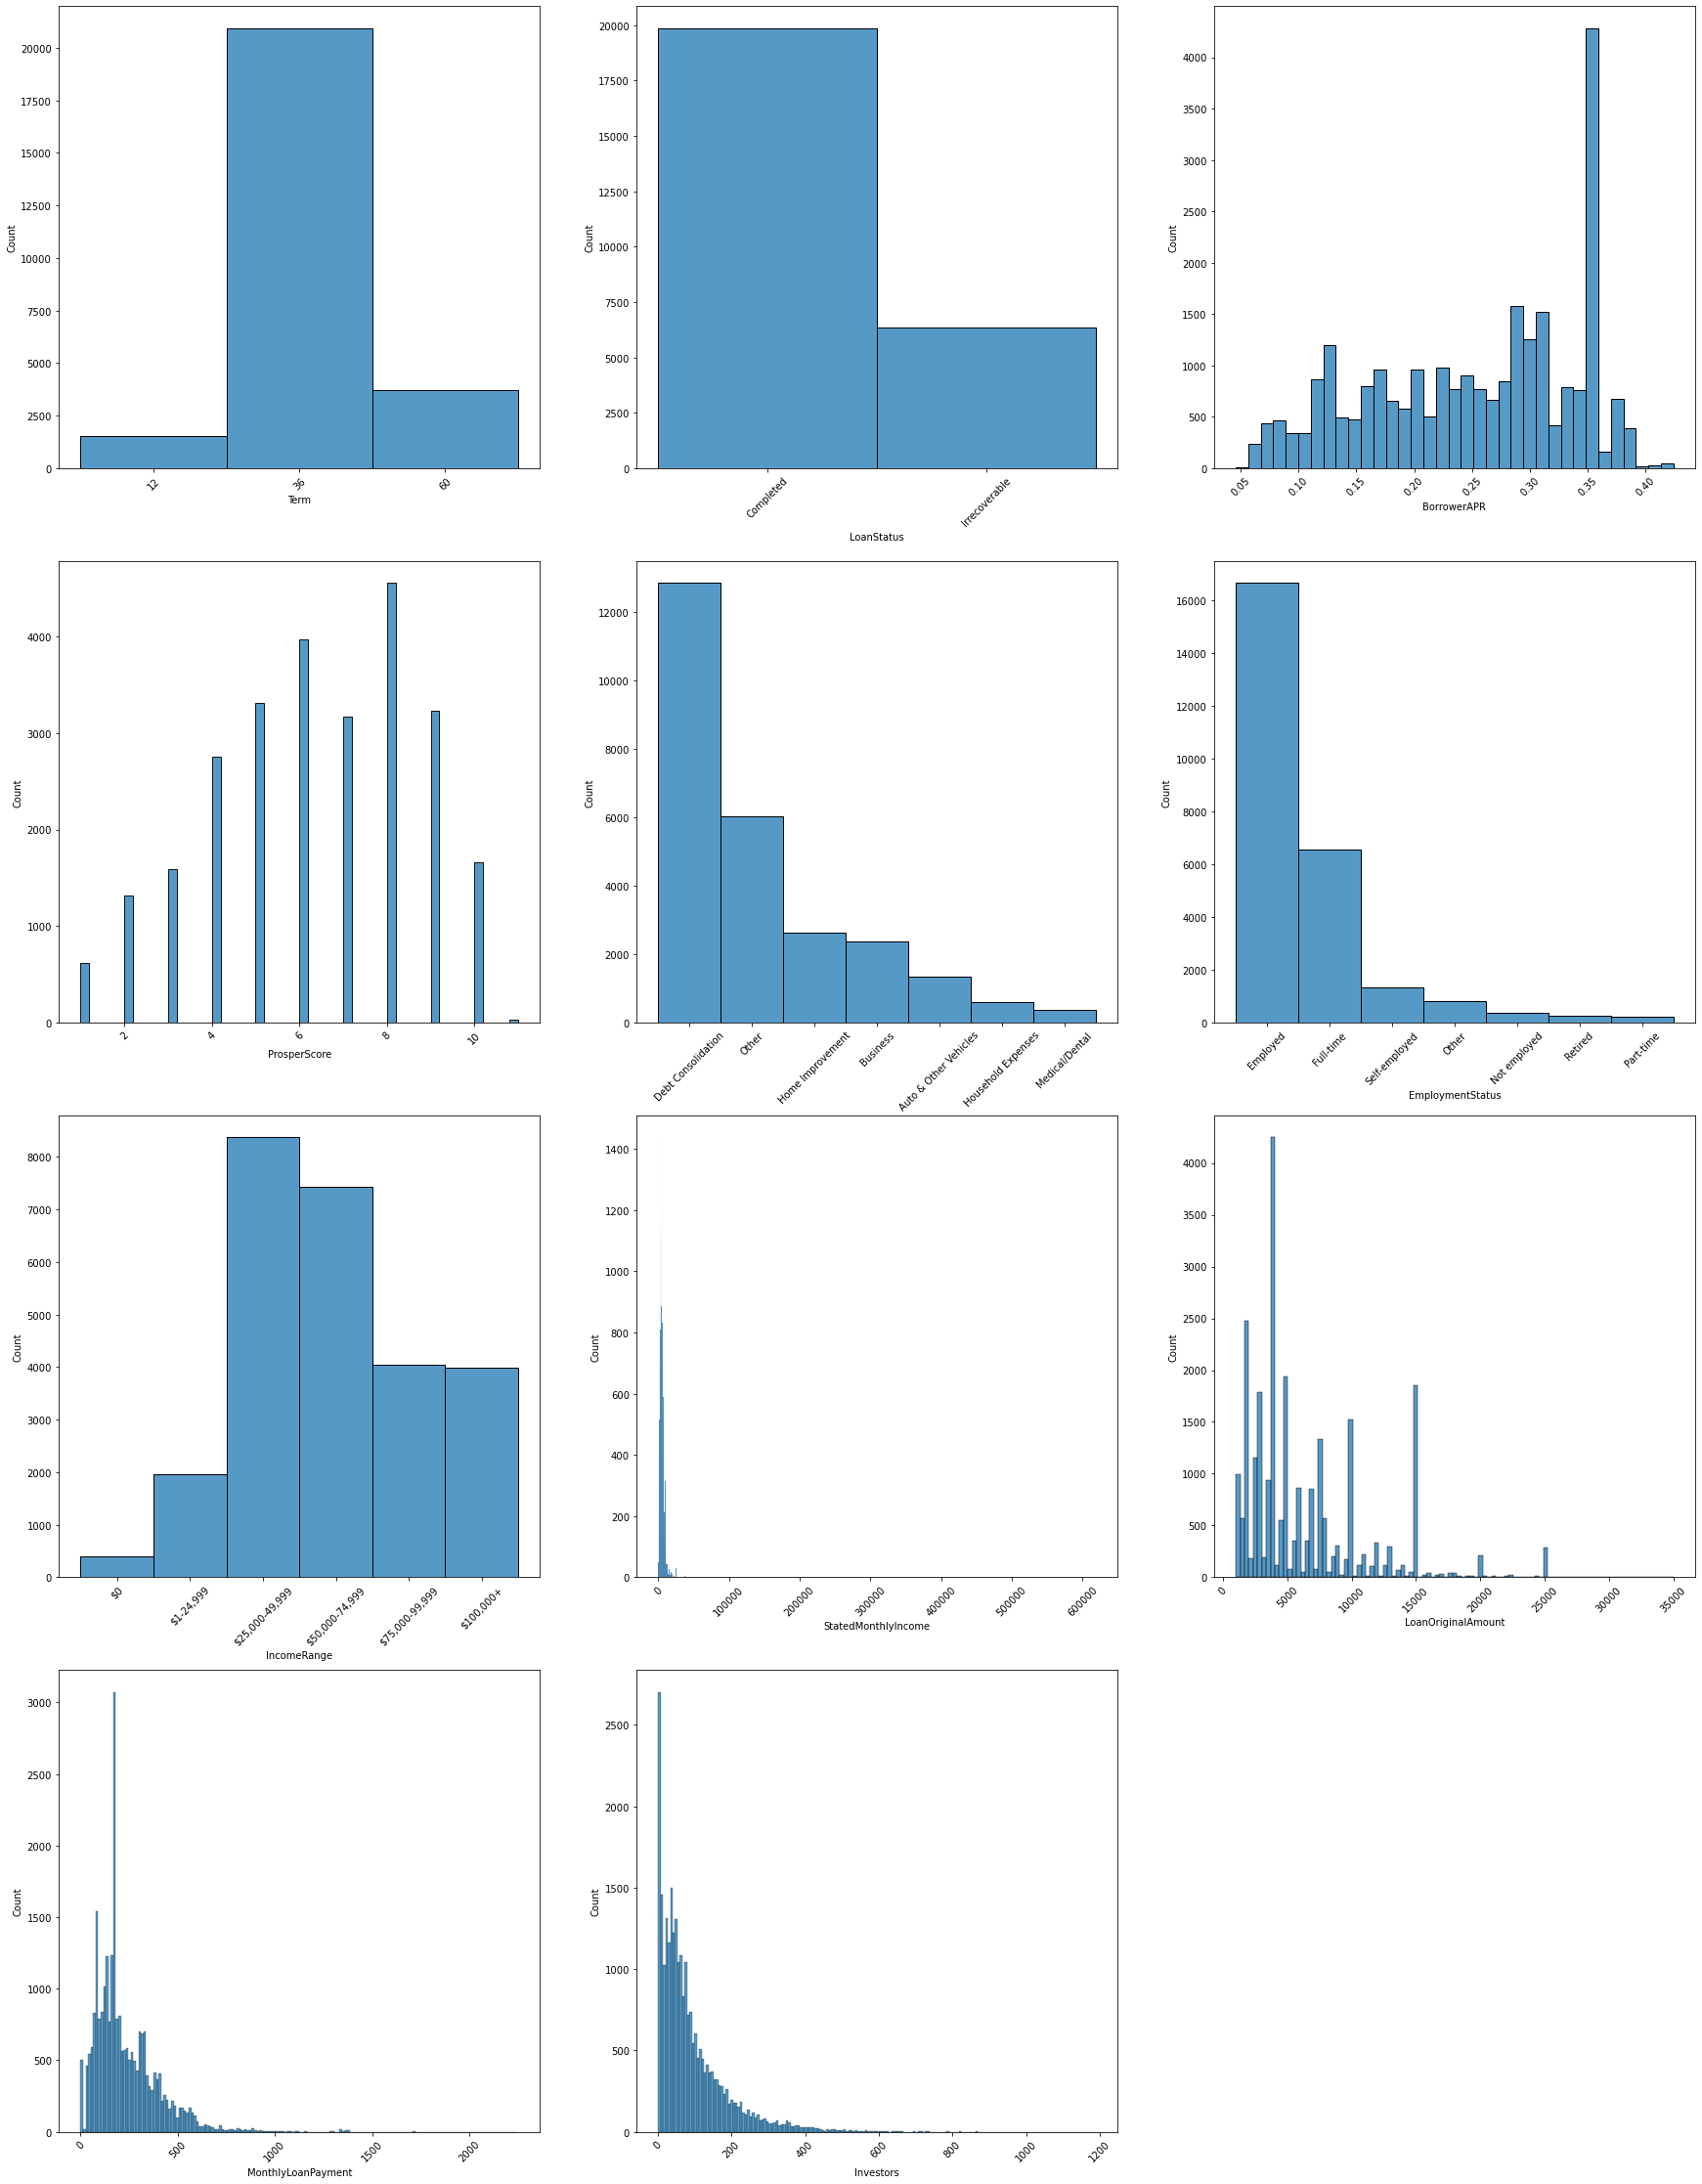

In [34]:
# Plot the distributions of the variables
rows = 4
cols = 3
num_cols = loan_status.select_dtypes(exclude={'bool'}).columns
fig = plt.figure(figsize = (cols * 10, rows * 10))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)
    sb.histplot(x = loan_status[col], ax  =ax)
    plt.xticks(rotation=45)
    

# Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

<i> Observations: </i>
- **Term**: The majority of loans are issued for 36 months followed by 60 months 
<br> <br>
- **LoanStatus**: More than three times as many loans are completed than those that are irrecoverable 
<br> <br>
- **BorrowerAPR**: The majority of loans fall between 0.05 and 0.40
    - There is large peak just after 0.35, representing the highest frequency of interest rates for issued loans
    - The next highest peaks are around 0.30 and 0.12
<br> <br>
- **ProsperScore**: Scores are slightly skewed to the left, with highest scores being 8 and 6 respectively
    - The lowest frequencies are at 11 and 1 respectively
<br> <br>
- **ListingCategory**: Most of the loans taken out are for debt consolidation
<br> <br>
- **EmploymentStatus**: Most borrowers are employed
    - An almost insignificant amount are part-time workers or retired
<br> <br>
- **IncomeRange**: Most borrowers have an income between $25,000 and $74,999 <br>
    - The data is slightly skewed to the left
<br> <br>
- **StatedMonthlyIncome**: Heavily skewed to the right. It is difficult to properly visualise the data because of the extreme range but most of the values seem to be concentrated around 0 to $2,000
    - I will have to take a closer look
<br> <br>
- **LoanOriginalAmount**: Most loans taken out are valued around $3,000
- There are also peaks at $10,000 and $15,000
    - There are smaller peaks at $20,000 and $25,000
<br> <br>
- **MonthlyLoanPayment**: The data is skewed to the right, with a massive peak around a 200 monthly payment
<br> <br>
- **Investors**: The data is skewed to the right, with a massive peak at 0. Investors did not participate in a lot of loans that presumably did not meet their criteria


<u><i> Closer look at StatedMonthlyIncome </u></i>

- StatedMonthlyIncome is very heavily skewed to the right that we cannot get a proper idea of the distribution. There appear to be extreme outliers distorting the visualisation


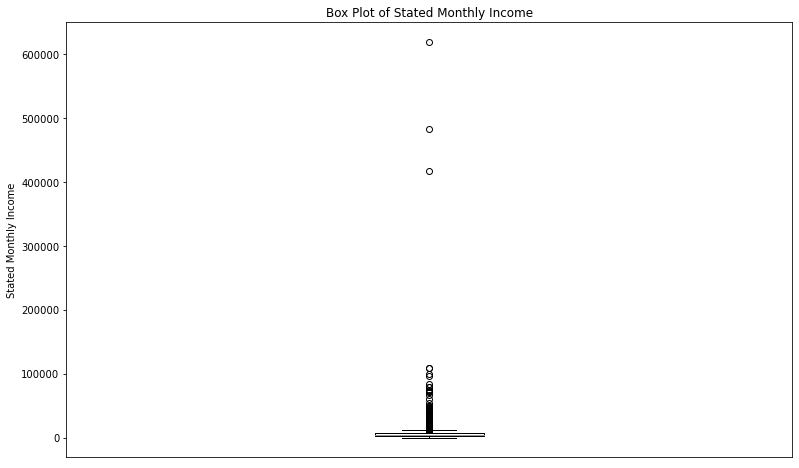

In [35]:
# Plot a boxplot to visualise potential outliers
plt.figure(figsize = [13, 8])
plt.boxplot(loan_status['StatedMonthlyIncome'])
plt.ylabel('Stated Monthly Income')
plt.xticks([0], labels = '')
plt.title('Box Plot of Stated Monthly Income');

<i> Observations: </i>

- The majority of observations appear to be below $25,000. However we see an observation that extends the range of the data to around $600,000

- The <i> **empirical rule** </i> states that 99.7% of the data observed following a normal distribution lies within 3 standard deviations of the mean.

- I will us this rule establish a range limit for StateMonthlyIncome to ensure that only the most relevant data is included

- Any observations above this limit will be dropped from the investigation

<i> Source: https://www.investopedia.com/terms/e/empirical-rule.asp#:~:text=Key%20Takeaways,standard%20deviations%20from%20the%20mean </i>

<i> Source: https://www.investopedia.com/terms/t/three-sigma-limits.asp </i>

<u><i> Identify limit of observations </u></i>

In [36]:
# Calculate mean of StatedMonthlyIncome
mean = loan_status['StatedMonthlyIncome'].mean()
# Calculate standard deviation of StatedMonthlyIncome
std_dev = loan_status['StatedMonthlyIncome'].std()
# Calculate limit of StatedMonthlyIncome
limit = (std_dev * 3) + mean
limit

25918.43358214343

In [37]:
# Create new dataframe excluding StatedMonthlyIncome > limit
update_loan_status = loan_status[loan_status['StatedMonthlyIncome'] <= limit]
loan_status = update_loan_status.copy()

#### Question 2: What is the distribution of StatedMonthlyIncome?

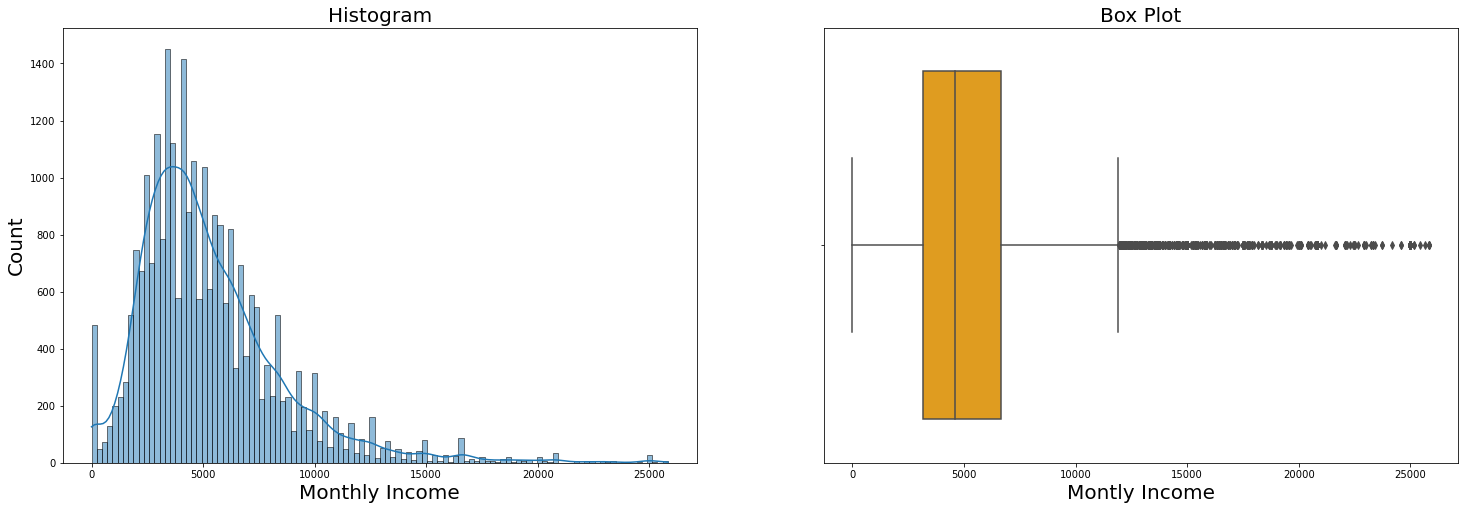

In [38]:
# Plot new distribution of Stated Monthly Income / subplots of histogram and boxplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
# Plot histogram
sb.histplot(data = loan_status, x = 'StatedMonthlyIncome', kde = True, ax = ax1)
ax1.set_xlabel('Monthly Income',  fontsize = 20)
ax1.set_ylabel('Count', fontsize = 20)
ax1.set_title('Histogram', fontsize = 20)
# Plot boxplot
sb.boxplot(data = loan_status, x = 'StatedMonthlyIncome', ax = ax2, color = 'orange')
ax2.set_xlabel('Montly Income', fontsize = 20)
ax2.set_title('Box Plot', fontsize = 20);

# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html


<i> Observations:</i>
- Histogram
    - We see that the data is still skewed to the right but now we see that the vast majority if observations are below $26,500
    - Most incomes are concentrated around the $5,000 level, with the observation dropping off drastically after $10,000

- Boxplot
    - The median income is around $5,000
    - 50% of the observations appear to lie between the $3,000 and $7,000 levels
    - Q3 is around $12,000
    - Outliers are between $12,000 and $26,500


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I reduced the number of categories in LoanStatus from 11 to 2 as I only wanted to focus on loans that were either completed or irrecoverable. This included dropping observations that were past due, while consolidating Completed and FinalPaymentInProgress into one category named 'Completed' as well as Chargedoff and Defaulted into 'Irrecoverable'.

> The resultant distribution was more than three quarters of loans being considered as 'Completed', with the rest 'Irrecoverable'.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are a few variables that are skewed to right (StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanAmount, Investors).

> StatedMonthlyIncome was heavily distorted by some outliers. I removed these outliers as they had very low frequencies and thus not considered to be significant for the study. The result is that we get a better idea of the distribution from a visual point of view with only the most significant observations included.

> The only other variable of note was BorrowerAPR, which has an unusually long peak at 0.35 but I felt that making changes to the data would be unnecessary.


## Bivariate Exploration

> In this section, I will investigate relationships between some of the pairs of variables in the data.

#### Question 1: Can we identify any relationships between the variables?

Correlation Heatmap

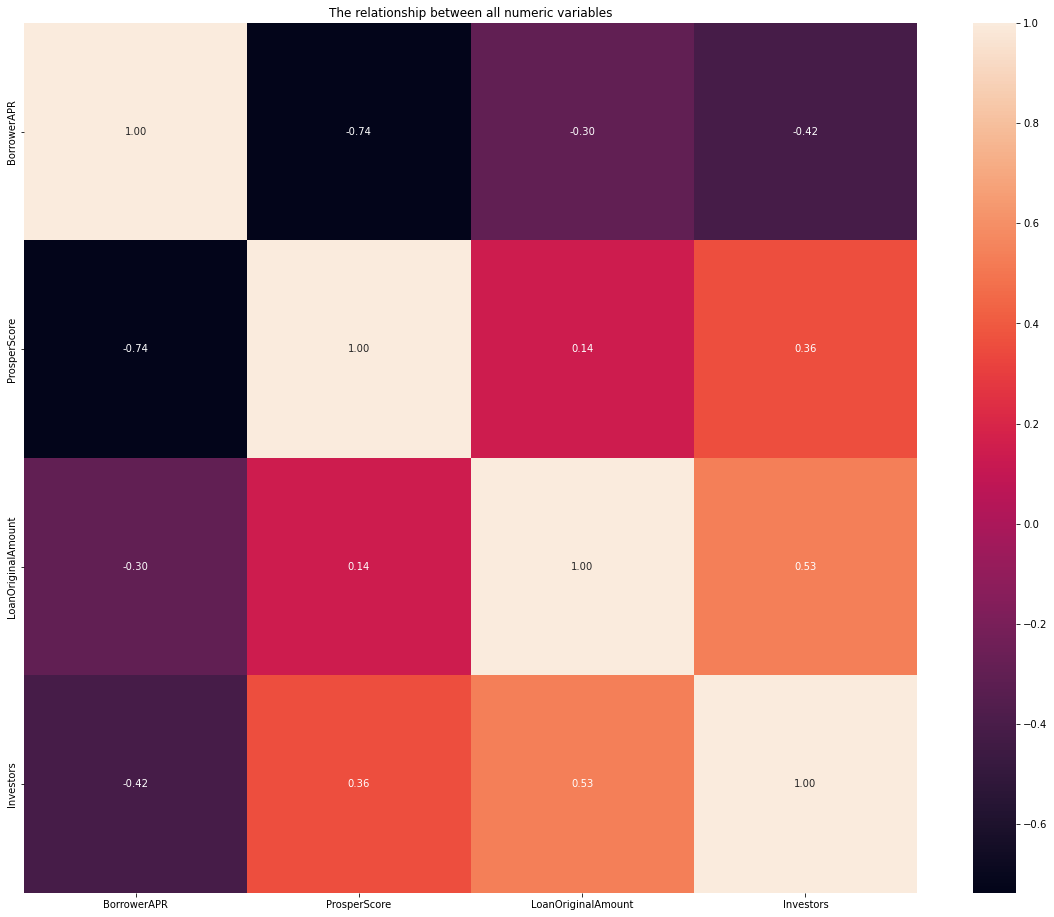

In [39]:
variables = ['BorrowerAPR', 'ProsperScore', 'ListingCategory',
             'LoanOriginalAmount', 'EmploymentStatus','Investors']

# plotting the correlation heat map between the quantitative selected variables
plt.figure(figsize = [20, 16])
sb.heatmap(loan_status[variables].corr(), annot = True, fmt ='.2f')
# title
plt.title("The relationship between all numeric variables");

# Source: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

Pair Grid

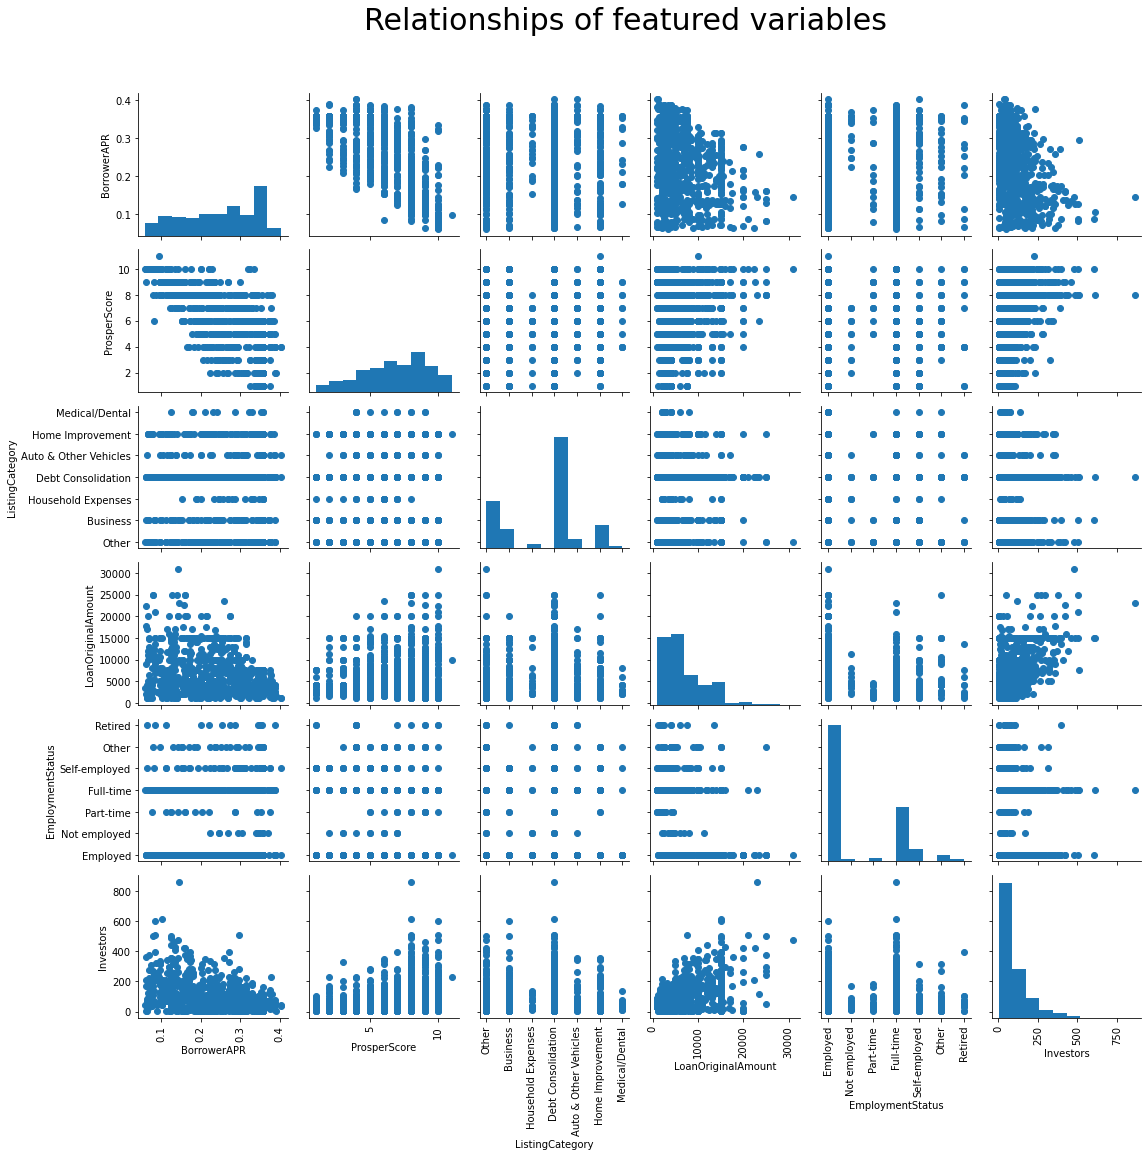

In [40]:
# Show pairs relationship highlighted by loan status
g = sb.PairGrid(data = loan_status.sample(1000), vars = variables)
# Plot histograms
g.map_diag(plt.hist)
# Plot scatterplots
g.map_offdiag(plt.scatter)
# Add title
g.fig.suptitle('Relationships of featured variables', size = 30)
g.fig.subplots_adjust(top = .9)
# Add axis labels
g._add_axis_labels()
# Rotate ticks
g.fig.draw(g.fig.canvas.get_renderer())
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
 
# Source: http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/tutorial/axis_grids.html
# Source: https://github.com/mwaskom/seaborn/issues/1853

<i> Observation: </i>

- The most significant relationship is between the original loan amount and monthly loan payments. The relationship has a correlation coefficient of 0.85. You would expect a higher loan amount to coincide with higher monthly loan payments.

- The next most significant relationship is between BorrowerAPR and ProsperScore. The relationship is negative with a correlation coefficient of 0.74, indicating that borrowers with higher Prosper Scores receive more favourable interest rates. 

- Other relationships of interest include
    - Slightly negative relationship between the loan amount and BorrowerAPR - interest rates may be lower for larger loan amounts
    - Slightly negative relationship between the number of investors and BorrowerAPR - interest rates may be lower for loans that have more investors invested
    - The number of investors has a similarly positive relationship with ProsperScore, LoanOriginalAmount and MonthlyLoanPayment
    - An increase in the number of investors may lend credibility to a borrower and thus result in a higher Prosper Score
    - An increase in the number of investors means that there would be more funds available to lend out, hence a higher loan amount and therefore a higher monthly loan payment



#### Question 2: Which ProsperScore is most associated with the likelihood of an irrecoverable loan?

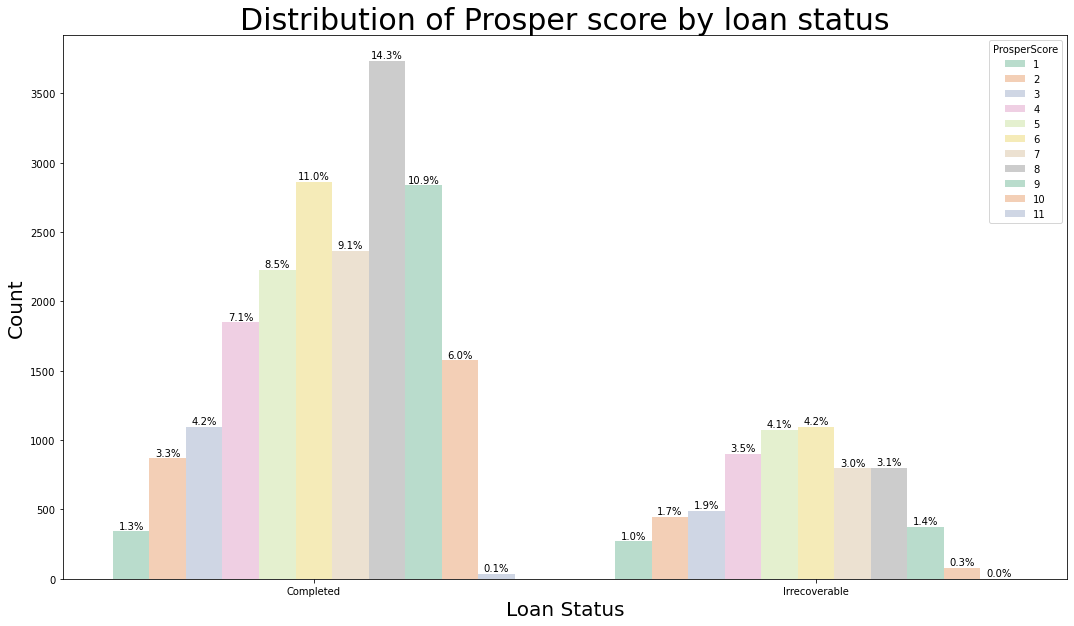

In [41]:
# Plot count plot
plt.figure(figsize = [18, 10])
ax = sb.countplot(data = loan_status, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Pastel2')
plt.xlabel('Loan Status',fontsize = 20)
plt.ylabel('Count', fontsize = 20);
plt.title('Distribution of Prosper score by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Create function to show percentages
def percent_func():
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    return ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

# Source: https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w


<i> Observations </i>
- ProsperScores of 6, 5 and 4 are the most prevalent scores for irrecoverable loans, making up 4.2% and 4.1% and 3.5% of total combined completed and irrecoverable loans respectively.
- There is only one irrecoverable loan amongst borrowers with a ProsperScore of 11
- The most completed loans have borrowers with a ProsperScore of 8, followed by 6 and 9

#### Question 3: What is the Prosper score distribution for irrecoverable loans?

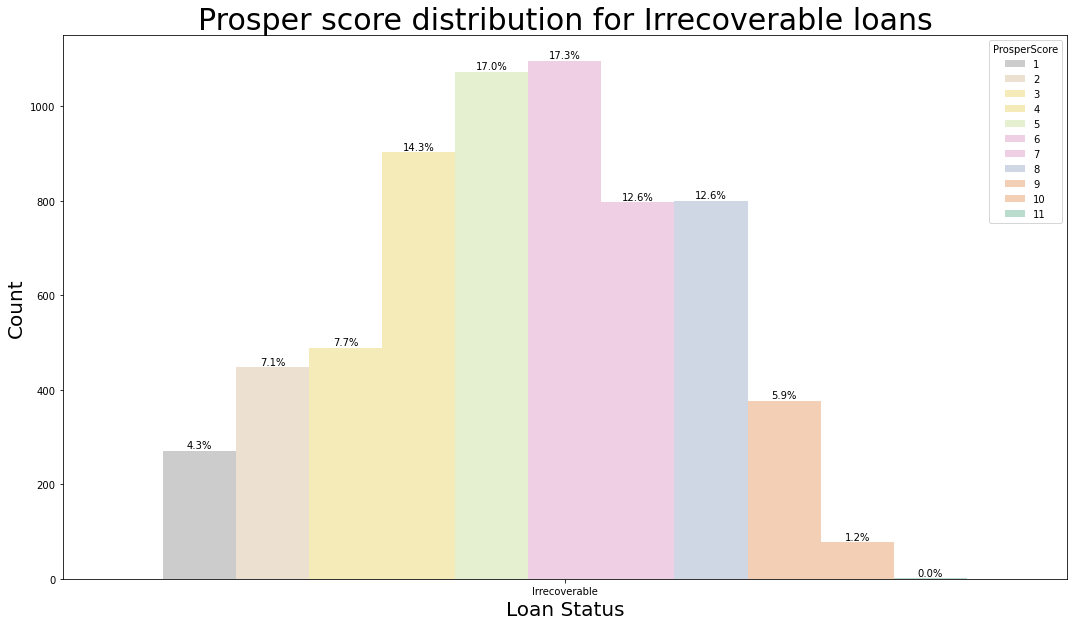

In [42]:
# Plot count plot
df = loan_status.query('LoanStatus == "Irrecoverable"')
df['LoanStatus'] = df['LoanStatus'].astype('str').copy()
plt.figure(figsize = [18, 10])
ax = sb.countplot(data = df, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Pastel2_r')
plt.xlabel('Irrecoverable',fontsize = 20)
plt.ylabel('Count', fontsize = 20);
plt.title('Prosper score distribution for Irrecoverable loans', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(df)
for p in ax.patches:
    percent_func()

<i> Observations </i>
- Prosper Scores between 1 and 6 make up 67.7% of irrecoverable loans 
- Prosper scores between 7 and 10 make up 32.3% of irrecoverable loans

#### Question 4: Which employment status is more associated with an irrecoverable loan?

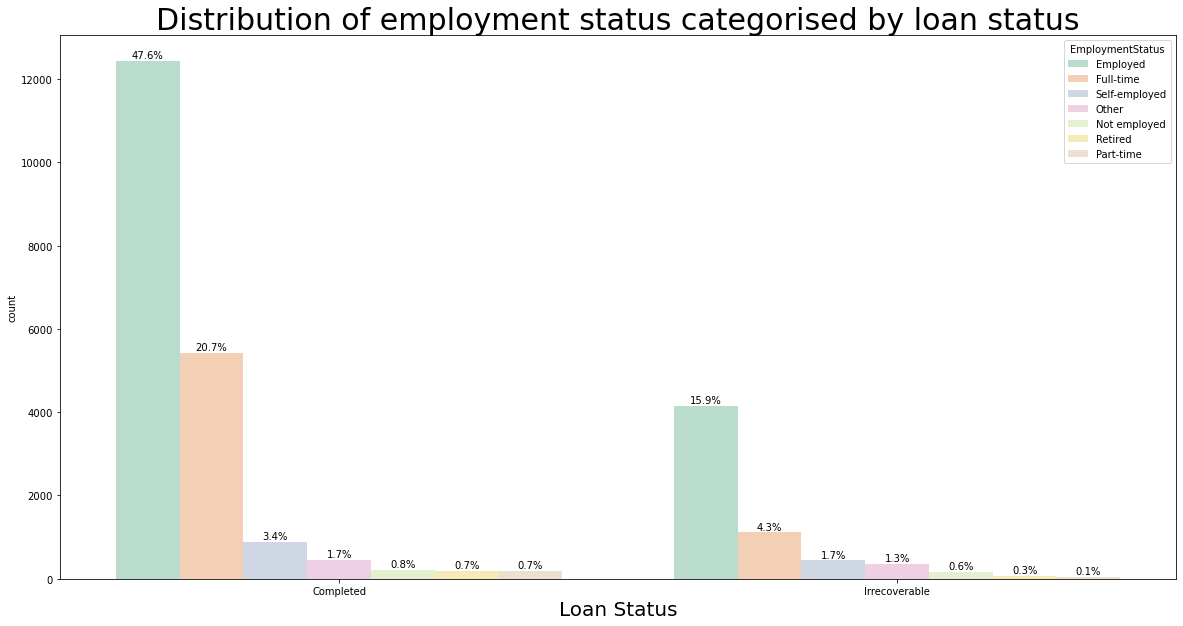

In [43]:
# Plot count plot
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x ='LoanStatus', hue ='EmploymentStatus', palette = 'Pastel2');
plt.title('Distribution of employment status categorised by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

<i> Observations: </i>

- Borrowers that are employed dominate the total number of loans issued
- There is not much difference in the distributions between irrecoverable and completed loans
    - There does not appear to be a relationship here

#### Question 5: Which loan category is more associated with an irrecoverable loan?

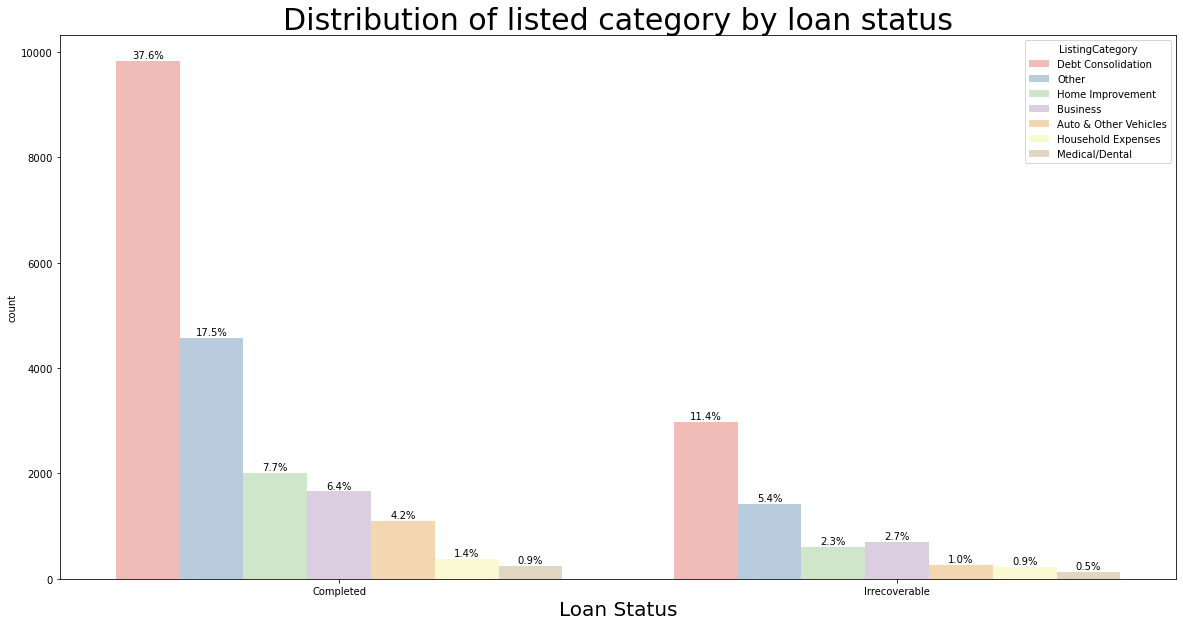

In [44]:
# Plot bar chart
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x = 'LoanStatus', hue = 'ListingCategory', palette = 'Pastel1')
plt.title('Distribution of listed category by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20);

# Show percentages
# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

Observations:
- The most common type of loan is for debt consolidation
    - This also makes it the most common loan that becomes irrecoverable. Other loans,business and home improvement loans are the next most common
- The other most common completed loans are for home improvements and business respectively
- There is very little difference between the frequency of completed and irrecoverable loans for household expenses and medical/dental

#### Question 6: Which income range is more associated with an irrecoverable loan?

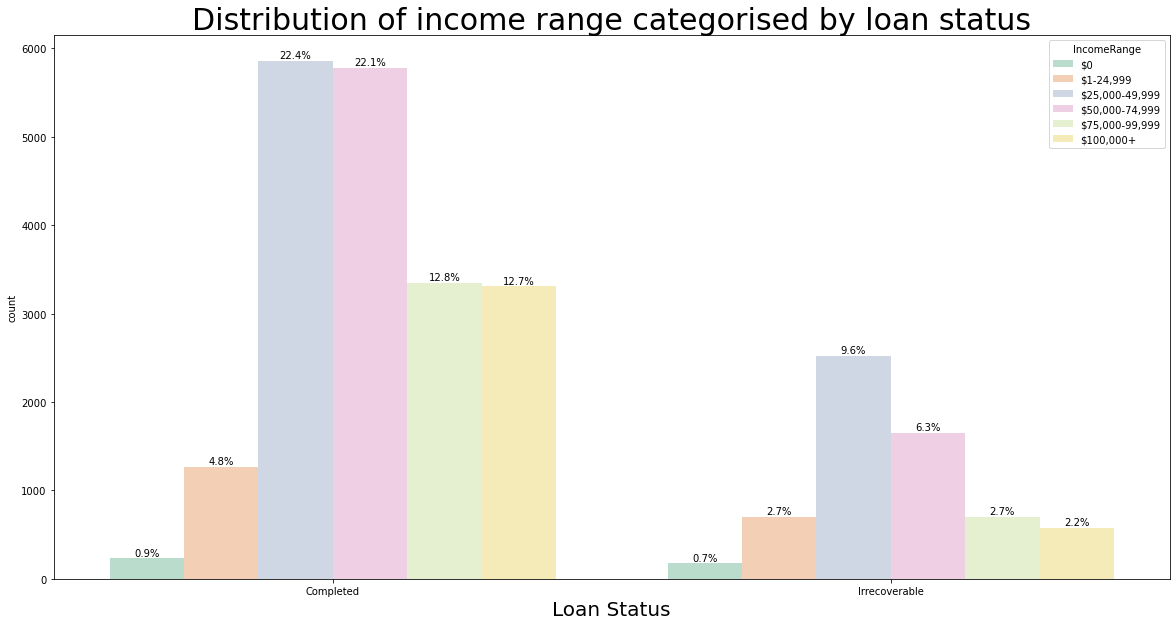

In [45]:
# Plot chart
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x ='LoanStatus', hue = 'IncomeRange', palette = 'Pastel2')
plt.title('Distribution of income range categorised by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

<i> Observations </i>

- Most borrowers are in the $25,000 to $74,999 income range, making up 44.5% of borrowers
- Borrowers in the $25,000 to $49,999 income range appear to be the most likely not to complete their loans
- Loans for borrowers with $0 appear almost as likely to be irrecoverable as completed. Initial savings may play a part in them being able to service the debt without an income

#### Question 7: Do homeowners default more often?

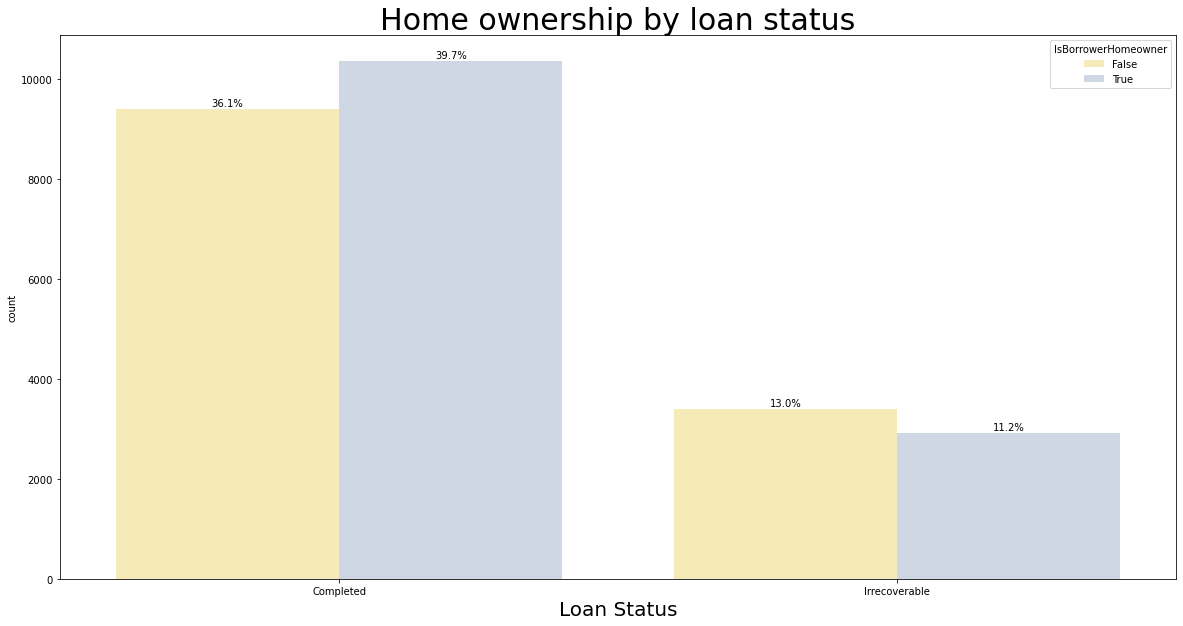

In [46]:
# Plot chart
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x ='LoanStatus', hue ='IsBorrowerHomeowner', palette = 'Pastel2_r')
plt.title('Home ownership by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

<i> Observations: </i>
- It appears that borrowers who do not own homes are slightly more likely to default than homeowners

#### Question 8: Which loan term is associated with the most defaults?

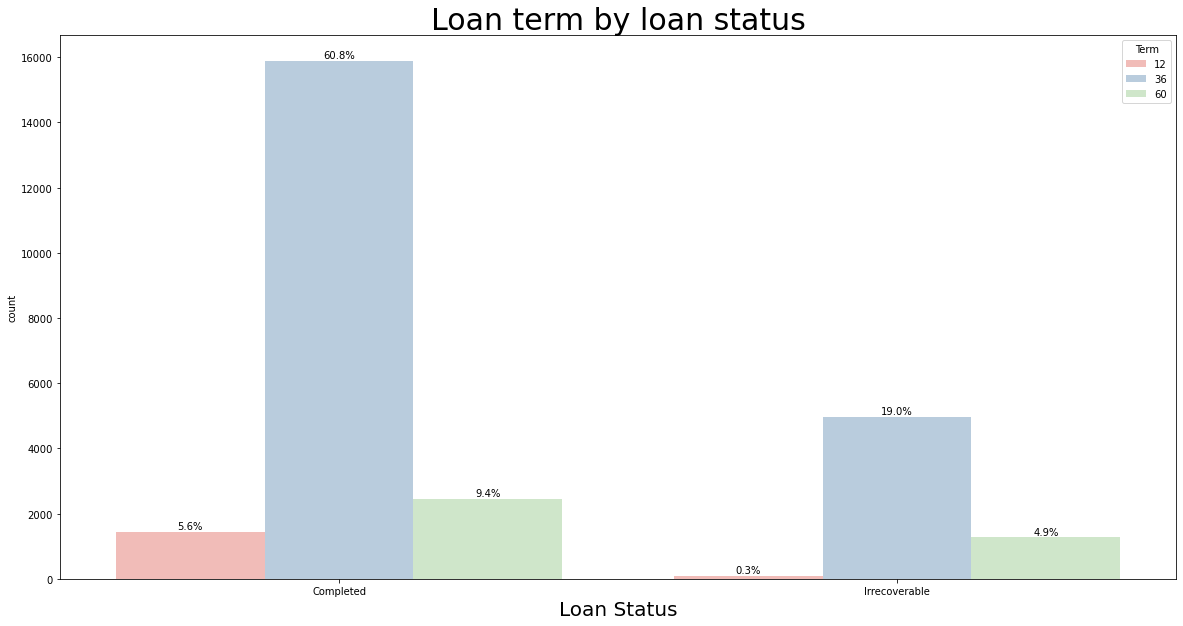

In [47]:
# Plot chart
plt.figure(figsize = [20, 10])
ax = sb.countplot(data = loan_status, x = 'LoanStatus', hue = 'Term', palette = 'Pastel1')
plt.title('Loan term by loan status', fontsize = 30)
plt.xlabel('Loan Status', fontsize = 20)

# Show percentages
total = len(loan_status)
for p in ax.patches:
    percent_func()

<i> Observations: </i>
- The majority of loans taken out are for a 36 month term. 
    - Most of the defaults are for loans with a 36 month term
    - There are very few defaults for 12 month loans

#### Question 9: What is the relationship between loan status and Borrower APR

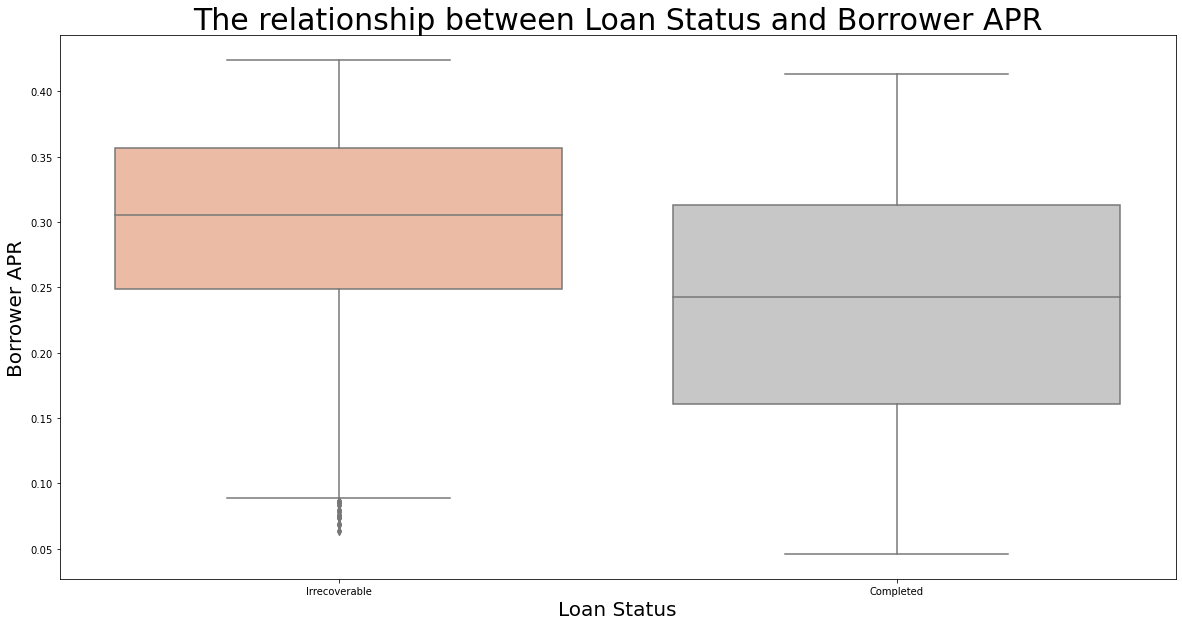

In [48]:
# Set order for chart
order = loan_status.groupby(by=['LoanStatus'])['BorrowerAPR'].median().sort_values().iloc[::-1].index
# Plot chart
plt.figure(figsize = [20, 10])
sb.boxplot(data=  loan_status, y = 'BorrowerAPR', x =  'LoanStatus', palette = 'RdGy', order = order)
plt.xlabel('Loan Status', fontsize = 20)
plt.ylabel('Borrower APR', fontsize = 20)
plt.title('The relationship between Loan Status and Borrower APR', fontsize = 30);

<i> Observations </i>

- Irrecoverable loans are more associated with a higher interest rate, on average, than completed loans
- The median rate for irrecoverable loans is 0.30 and 0.25 for completed loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The most significant relationship we see is that irrecoverable loans are most associated with borrowers that have a higher BorrowerAPR. This makes sense as high interest rate loans tend to be more difficult to pay off.

> Digging a bit deeper, we find that ProsperScore may be the key variable that can determine whether a loan is completed or not. The is a strong negative relationship between ProsperScore and BorrowerAPR, with a lower ProsperScore associated with a higher interest rate i.e. riskier investors will be given a lower risk rating that will result in a higher rate and thus increase the likelihood of a loan not being completed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are some notable relationships between investors and a number of other variables. 
- This include a slightly negative with BorrowerAPR, indicating that investors prefer borrowers with lower interest and thus a higher ProsperScore.
- There is also positive relationship with LoanOriginalAmount and MonthlyLoanPayment indicating that there is more money available to borrowers and more investors are involved.

## Multivariate Exploration

> In this section, I will investigate how the interaction between some of the variables impact on the likelihood of a loan being completed.

#### Question 1: What is the distribution of irrecoverable loans on variable relationships?

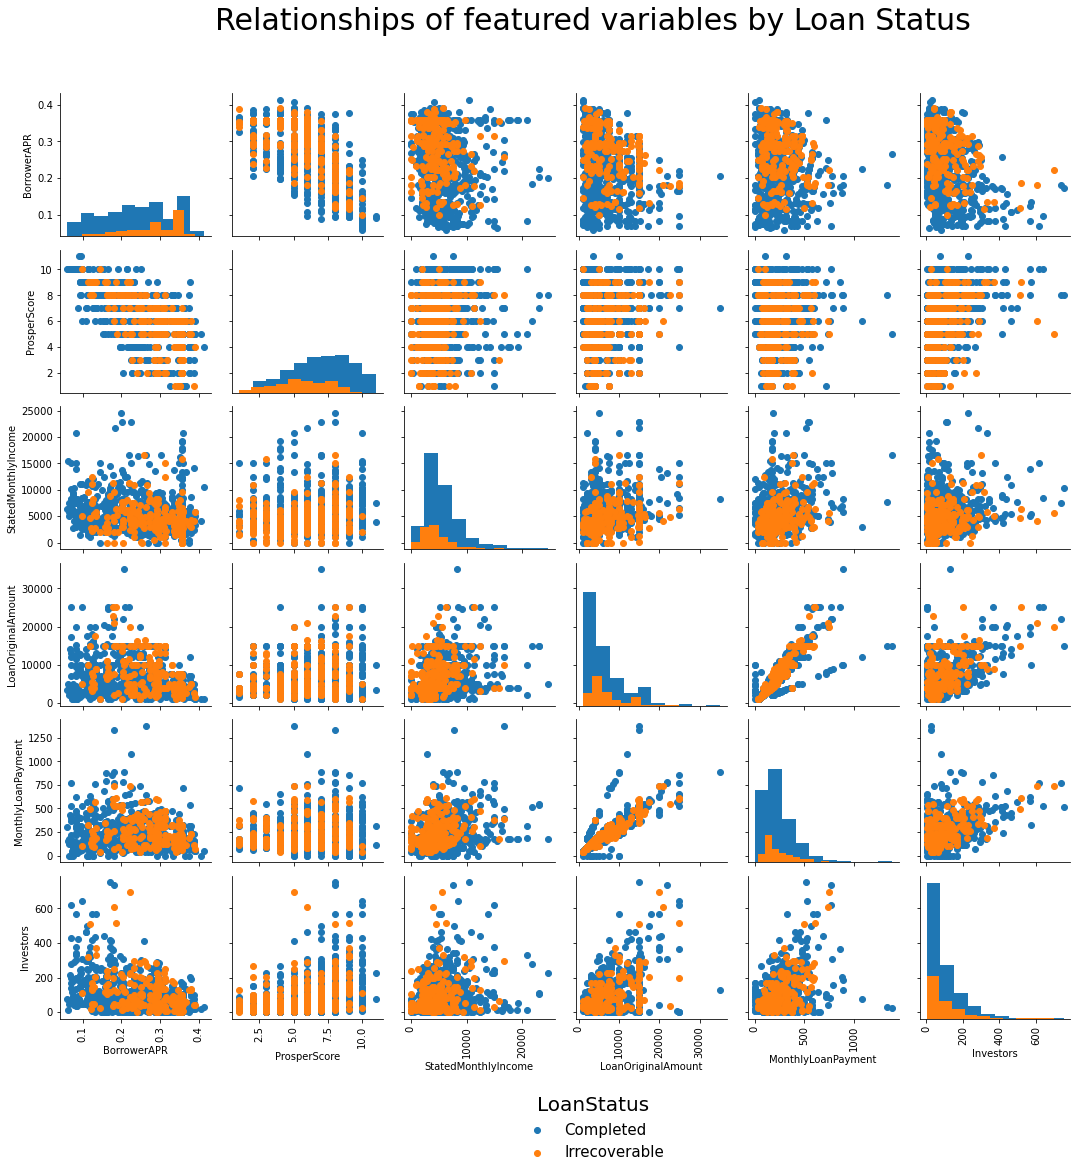

In [49]:
variables = ['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome',
             'LoanOriginalAmount', 'MonthlyLoanPayment','Investors']
# Show pairs relationship highlighted by loan status
g = sb.PairGrid(data = loan_status.sample(1000), vars = variables, hue= 'LoanStatus')
# Plot histograms
g.map_diag(plt.hist)
# Plot scatterplots
g.map_offdiag(plt.scatter)
# Add title
g.fig.suptitle('Relationships of featured variables by Loan Status', size = 30)
g.fig.subplots_adjust(top = .9)
# Add axis labels
g._add_axis_labels()
# Add legend
g.add_legend()
# Move and resize legend
sb.move_legend(g, "lower center", bbox_to_anchor =  (0.5, -0.1), fontsize = 15, title_fontsize = 20)
# Rotate ticks
g.fig.draw(g.fig.canvas.get_renderer())
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
 
# Source: http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/tutorial/axis_grids.html
# Source: https://github.com/mwaskom/seaborn/issues/1853

<i> Observations </i>

- **Investors to BorrowerAPR**: The negative relationship shows that a lower number of investors coupled with higher interest rates leads to more irrecoverable loans
- **Investors to StateMonthlyIncome**: Irrecoverable loans are concentrated where lower incomes meet a lower number of investors
- **StatedMonthlyIncome**: There are very few irrecoverable loans at a stated monthly income above $10,000

#### Question 2: Does the relationship between income and the Prosper Score determine the likelihood of a default? 

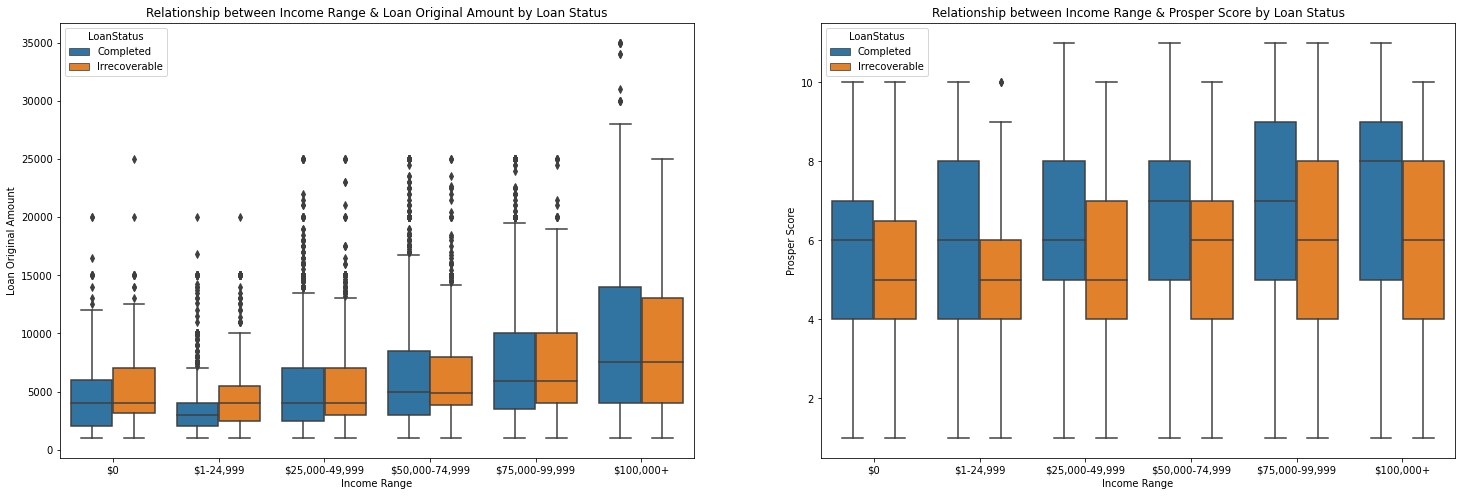

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 8))

sb.boxplot(data=loan_status, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus', ax = ax1)
ax1.set_xlabel('Income Range')
ax1.set_ylabel('Loan Original Amount')
ax1.set_title('Relationship between Income Range & Loan Original Amount by Loan Status')

sb.boxplot(data = loan_status, x = 'IncomeRange', y = 'ProsperScore', hue = 'LoanStatus', ax = ax2)
ax2.set_xlabel('Income Range')
ax2.set_ylabel('Prosper Score')
ax2.set_title('Relationship between Income Range & Prosper Score by Loan Status');

# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

<i> Observations </i> 

**Loan Original Amount vs Income Range**
- The median loan amount is below $10,000 across all income levels.
- The is no difference between the median loan amounts for completed and irrecoverable loans for each income level. 
- The only exception is the $1 - 24,999 range where the loan amount for an irrecoverable loan is slightly higher than a completed loan.

**Prosper Score vs Income Range**
- The median Prosper Score for irrecoverable loans is lower than that of completed loans. This is true across all income ranges, indicating that a loan with a lower Prosper Score, regardless of income level, is more likely to result in a default.

#### Question 3: What is the relationship between BorrowerAPR & Prosper Score on the likelihood of an irrecoverable loan

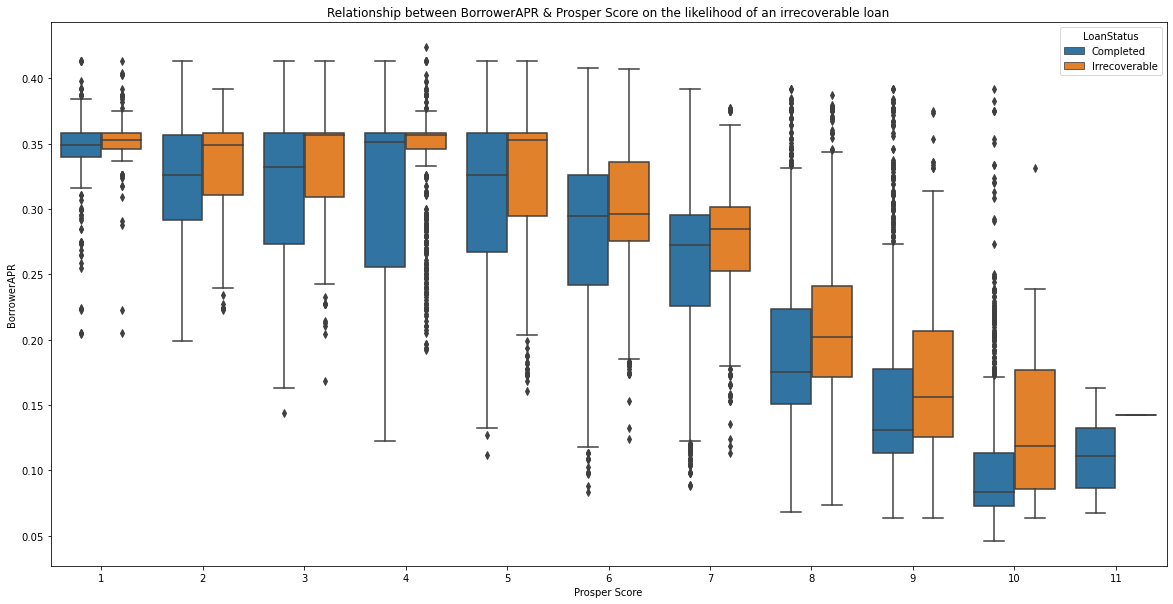

In [51]:
# Plot graph
plt.figure(figsize = [20, 10])
sb.boxplot(data = loan_status, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'LoanStatus')
plt.xlabel('Prosper Score')
plt.ylabel('BorrowerAPR')
plt.title('Relationship between BorrowerAPR & Prosper Score on the likelihood of an irrecoverable loan');

<i> Observations </i>
- For any given Prosper Score, irrecoverable loans generally have a higher interest rate than completed loans
- BorrowerAPR declines as Prosper Scores increase
- There is only one irrecoverable loan with a ProsperScore of 11

#### Question 4: Does the relationship between Loan Term and BorrowerAPR/Prosper Score determine the likelihood of a loan being irrecoverable? 


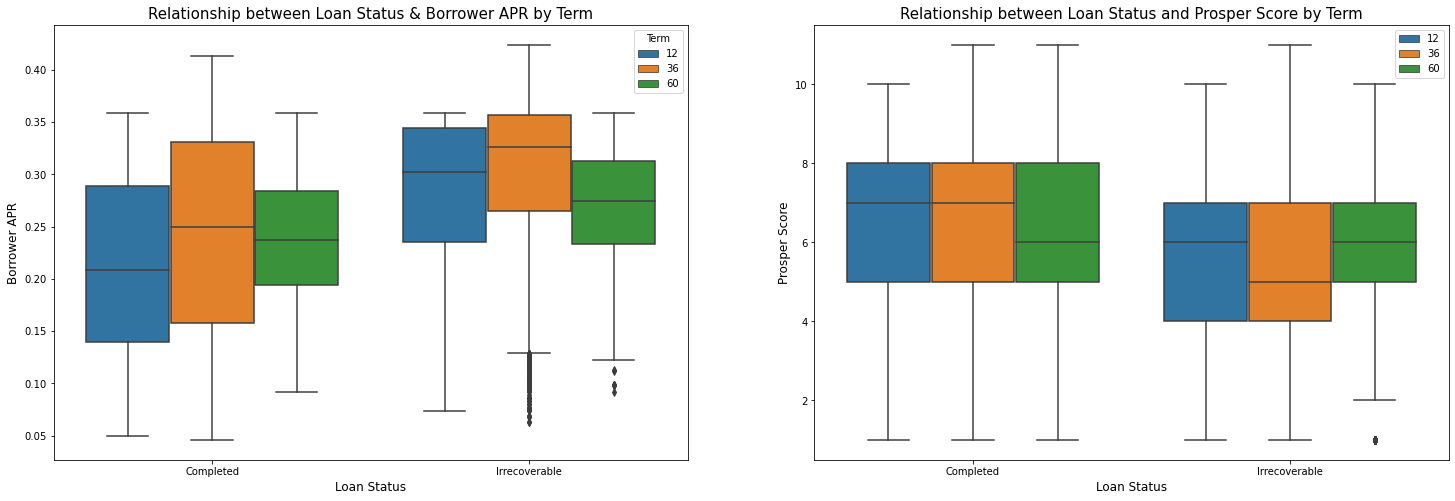

In [52]:
# Subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 8))
# Plot Loan Status vs Borrower APR by Term
sb.boxplot(data = loan_status, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term', ax = ax1)
ax1.set_xlabel('Loan Status', fontsize = 12)
ax1.set_ylabel('Borrower APR', fontsize = 12)
ax1.set_title('Relationship between Loan Status & Borrower APR by Term', fontsize = 15)
# Plot Loan Status vs ProsperScore by Term
sb.boxplot(data = loan_status, x = 'LoanStatus', y = 'ProsperScore', hue = 'Term', ax = ax2)
ax2.set_xlabel('Loan Status', fontsize = 12)
ax2.set_ylabel('Prosper Score', fontsize = 12)
ax2.set_title('Relationship between Loan Status and Prosper Score by Term', fontsize = 15)
ax2.legend(loc = 'upper right');

<i> Observations </i> 

**BorrowerAPR**
- Irrecoverable loans with a 36 month term have the highest median BorrowerAPR, followed by 12 months and then 60 months.
- For Completed loans, the lowest median BorrowerAPR is for a 12 month term. The 36 month term also has the highest BorrowerAPR.

**ProsperScore**
- The median ProsperScore for completed loans is the same for 12 and 36 month terms. The 60 month term has the lowest median ProsperScore.
- The median ProsperScore for irrecoverable loans is the same for 12 and 60 month terms. The 36 month term has the lowest median ProsperScore.

**Summary**
- We see that 36 month terms have the higher rates, which coincides with the lowest ProsperScores
- This supports the earlier finding of lower ProsperScores and higher interest rates leading to more irrecoverable loans but also gives us more additional information on which term may be the most problematic.

#### Relationship between Borrower APR and Investors by Prosper Score and Loan Status

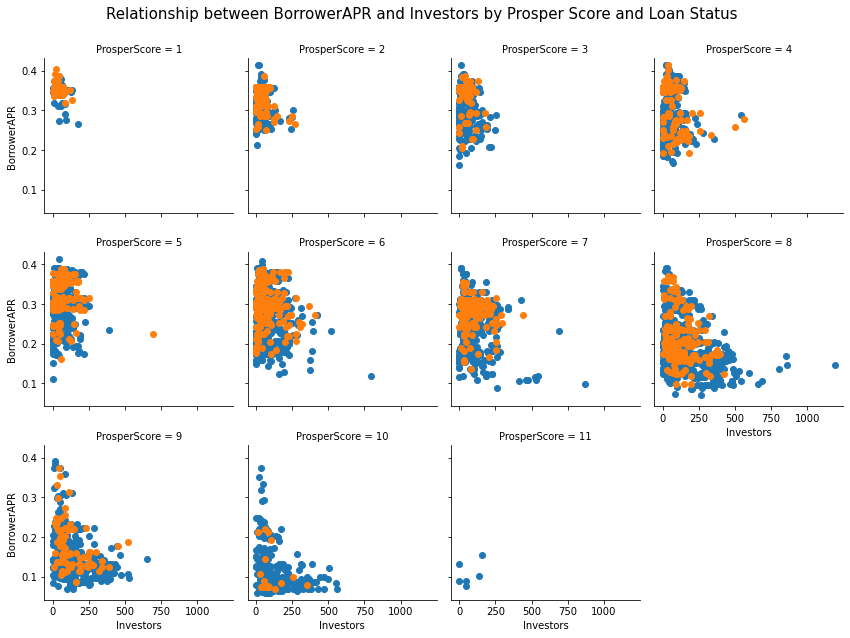

In [53]:
# Plot correlations
g = sb.FacetGrid(data = loan_status.sample(5000), col = 'ProsperScore', hue = 'LoanStatus', col_wrap = 4, height = 3)
g.map(plt.scatter, 'Investors', 'BorrowerAPR', alpha = 1);
# Add title
g.fig.suptitle('Relationship between BorrowerAPR and Investors by Prosper Score and Loan Status', size = 15)
g.fig.subplots_adjust(top = .9);

# Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

<i> Observations </i>

- The lowest Prosper Scores have the fewest amount of investors and the highest interest rates
- Irrecoverable loans for Prosper Scores between 5 and 8 have an almost even distribution across all the interest rates
- There are very few irrecoverable loans for Prosper Scores above 8

#### Stated Monthly Income & Loan Original Amount vs Prosper Score by Loan Status

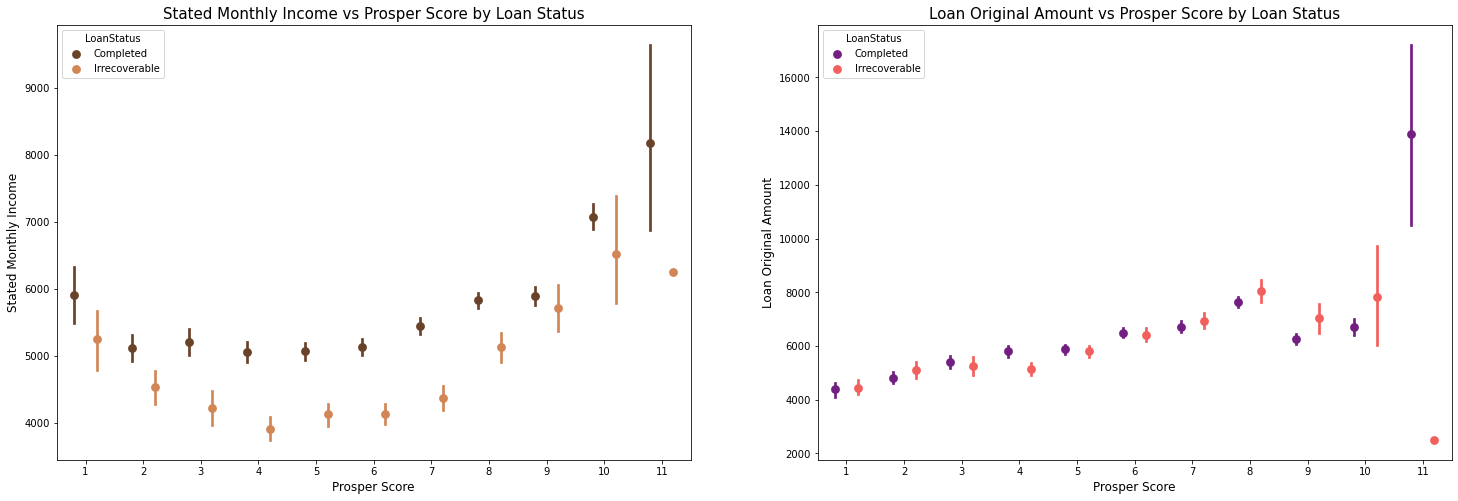

In [54]:
# Subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 8))
# Plot Loan StatedMonthlyIncome vs ProsperScore by LoanStatus
sb.pointplot(data = loan_status, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'copper', linestyles = '', dodge = 0.4, ax = ax1)
ax1.set_xlabel('Prosper Score', fontsize = 12)
ax1.set_ylabel('Stated Monthly Income', fontsize = 12)
ax1.set_title('Stated Monthly Income vs Prosper Score by Loan Status', fontsize = 15)
# Plot Loan LoanOriginalAmount vs ProsperScore by LoanStatus
sb.pointplot(data = loan_status, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'magma', linestyles = '', dodge = 0.4, ax = ax2)
ax2.set_xlabel('Prosper Score', fontsize = 12)
ax2.set_ylabel('Loan Original Amount', fontsize = 12)
ax2.set_title('Loan Original Amount vs Prosper Score by Loan Status', fontsize = 15);

<i> Observations </i>
- StatedMonthlyIncome vs ProsperScore
    - Irrecoverable loans for each Prosper Score are associated with lower incomes than their completed counterparts
    - Incomes decrease from Prosper Score 1 and reach their lowest levels at Prosper Score 4 and then steadily increase for each level
- LoanOriginalAmount vs ProsperScore
    - There is very little difference between loan amounts for irrecoverable and completed loans for each Prosper Score from 1 to 8
    - For scores of 9 and 10, irrecoverable loans had higher loan amounts than completed loans

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> - The biggest predictor of an irrecoverable loan appears to be a higher interest rate (BorrowerAPR).
> - The interest rate is influenced by the borrower's ProsperScore, which is influenced by their income level, loan amount and employment among other factors not explored here.
> - We also see that 36 month terms have higher rates, which coincides with the lowest ProsperScores
> - This supports the earlier finding of lower ProsperScores and higher interest rates leading to more irrecoverable loans but also gives us more additional information on which term may be the most problematic.

### Were there any interesting or surprising interactions between features?

> - Most loans are taken up by lower income borrowers and considering that most of the loans are for debt consolidation it may mean that the vast majority of this segment are struggling financially. 
> - Investors are most active at the higher ProsperScore levels
> - It was a bit surprising to to see that only one loan was irrecoverable for a ProsperScore of 11 in the sample.

In [55]:
loan_status.to_csv('cleanedloan_data.csv', index = None)